### Project II

# Neural Networks (Introduction)

Lecturer: Jan Bauer (jan.bauer@dhbw-mannheim.de)

### About me:

-  Mathematics-Economics M.Sc (Københavns Universitet, 2017)
-  Research Assistant (PhD Student) at the chair of Management (JGU Mainz, 2018)
-  Research Assistant (PhD Student) at the chair of Application Management (DHBW, 2019)

-  Research interests: (Time Series) Econometrics, Macroeconometrics & passion for everything statistic-ish

### About you:

-  Solid background in calculus (derivatives)
-  Python coding skills (presumably more than I have)
-  Recap the lecture to not loose track
-  Looking for typos (thank you)
-  In-lecture-feedback (pace, difficulty,...)

### Administrative Things

-  Lecture times: 1-2 times a week (as regular as possible)
-  Slides: Google Calendar
-  10 lectures of 3h each
-  Lecture 7(?): Paper
-  Sources: Notes
-  Questions? Email me!

-  Sources:
    - Neural Networks and Deep Learning (Charu C. Aggarwall)
    - Deep Learning (Ian Goodfellow, Yoshua Bengio & Aaron Courville)

### Exam

-  15.07. (?)
-  60min (?) or oral? If not $\to$ don't forget your calculator
-  Theoretical (I want you to understand the idea behind NN)
-  Mathematical
-  Coding (Pseudocode) - presumably, but not settled yet
-  Paper

### Structure (formal)

0. Appetizer

I. Initialization

II. Model

III. Loss (function)

IV. Optimization

### Structure (circle-ish)

1. Recognize handwritten digits (coding)


2. Understand the theory behind the code


3. Extend the theory


4. Improve the code

### Timeline

1. Today: Appetizer


2. First 3-4 Weeks: Understand the appetizer


3. Last 6-7 Weeks: Dive into Neural Networks


4. Week 11: Off


5. Week 12: Exam

# 0. Appetizer

Recognize handwritten digits using a NN in Tensorflow

### Tensor

-  complex mathematical map
-  what we have to know about them:
    - ***type***: tf.float32, tf.int64, tf.string,...
    - ***rank***: rank 0: Scalar. rank 1: Vector. rank 2: Matrix. rank 3: 3-Tensor (Cube)...
    - ***shape***: Number of elements in each dimension
        - scalar has shape ( )
        - vector has shape (N0)
        - matrix has shape (N0,N1)

### Why Tensors and not matrices?

Because we don't have to define the shape of a Tensor

In [2]:
################################
## Getting started & Data Set ##
################################

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#one_hot=TRUE: Conduct one-hot-encoding, i.e. the digit "1" [integer encoding] 
#              will be represented as (0,1,0,0,0,0,0,0,0,0).
#              28x28 pixels are flattened into a 784 vector
#              Grayscale of each pixel between 0 and 255 (black 255)

print(mnist.train.num_examples) # #55 000 train data
print(mnist.validation.num_examples) # #5000 validation data
print(mnist.test.num_examples) # #10 000 test data

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
55000
5000
10000


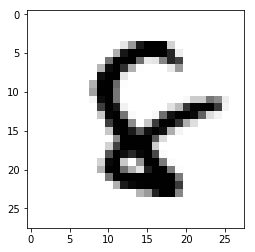

8


In [5]:
##################################
## How does the data look like? ##
##################################

import numpy as np
import matplotlib.pyplot as plt

i=800

dig = np.argmax(mnist.train.labels[i,:])
#argmax due to one-hot encoding.
#compare to using:
#dig = mnist.train.labels[i,:]

img = np.reshape(mnist.train.images[i,:], [28,28])
plt.imshow(img, cmap='Greys')
plt.show()
print(dig)

In [6]:
####################
## Architecture I ##
####################

## Single Layer NN
n_input = 784  # input layer (28x28 pixels)
n_output = 10  # output layer (0-9 digits)

#Define 3 tensors as placeholders (tensors that we'll feed with values later)

X = tf.placeholder("float", [None, n_input])   #None x 784
Y = tf.placeholder("float", [None, n_output])  #None x 10

In [7]:
#####################
## Hyperparameters ##
#####################

learning_rate = 1e-4
n_iterations = 1000
batch_size = 128

In [8]:
#######################################
## Architecture II & Getting Started ##
#######################################

# Initial values for Weights and Bias

weights = {
    'w1': tf.Variable(tf.truncated_normal(shape = [n_input, n_output], stddev=0.1)),
}

#weights are variables since they will be updated

biases = {
    'b1': tf.Variable(tf.constant(0.1, shape = [n_output])),
}


layer = tf.add(tf.matmul(X, weights['w1']) , biases['b1']) #using the identity



Instructions for updating:
Colocations handled automatically by placer.


In [9]:
####################################
## Loss Function and Optimization ##
####################################

cross_entropy = tf.reduce_mean(   
    tf.nn.softmax_cross_entropy_with_logits(  #use cross_entropy norm
        labels=Y, logits = layer
        ))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
                      #use the Adam Gradient Descent Optimizer

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
#####################
## Define Accuracy ##
#####################

correct_pred = tf.equal(tf.argmax(layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [11]:
################
## Run the NN ##
################

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y}
            )
        print(
            "Iteration",
            str(i),
            "\t Loss =",
            str(minibatch_loss),
            "\t Minibatch-Accuracy =",
            str(minibatch_accuracy)
            )

Iteration 0 	 Loss = 2.570116 	 Minibatch-Accuracy = 0.078125
Iteration 100 	 Loss = 2.164329 	 Minibatch-Accuracy = 0.1953125
Iteration 200 	 Loss = 1.8196056 	 Minibatch-Accuracy = 0.40625
Iteration 300 	 Loss = 1.5178676 	 Minibatch-Accuracy = 0.625
Iteration 400 	 Loss = 1.4307848 	 Minibatch-Accuracy = 0.6796875
Iteration 500 	 Loss = 1.2642115 	 Minibatch-Accuracy = 0.6875
Iteration 600 	 Loss = 1.1738114 	 Minibatch-Accuracy = 0.7109375
Iteration 700 	 Loss = 1.0439711 	 Minibatch-Accuracy = 0.7734375
Iteration 800 	 Loss = 0.96109724 	 Minibatch-Accuracy = 0.796875
Iteration 900 	 Loss = 0.7684494 	 Minibatch-Accuracy = 0.875


In [13]:
###########################
## Accuracy on test data ##
###########################

test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print("\nAccuracy on test data:", test_accuracy)


Accuracy on test data: 0.8185


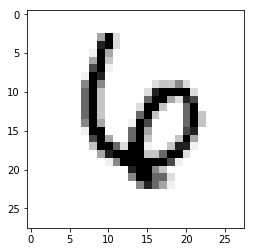

Prediction: 4


In [19]:
#######################################
## Checking the performance manually ##
#######################################

test_digit = 22

img = np.reshape(mnist.test.images[test_digit,:], [28,28])
plt.imshow(img, cmap='Greys')
plt.show()

#dig = np.argmax(mnist.test.labels[test_digit,:])
#print(dig)

prediction = sess.run(tf.argmax(layer, 1), feed_dict={X: mnist.test.images})
print ("Prediction:", np.squeeze(prediction)[test_digit])